In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import math
from keras.preprocessing.image import ImageDataGenerator
dim=(100,100)

In [2]:
a=cv2.imread("CT/"+str(1)+".jpeg")
b=cv2.imread("MRI/"+str(1)+".jpeg")
c=plt.imread("RESULT/"+str(1)+".tif")

ct_images = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY).reshape(-1,1)
mr_images = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY).reshape(-1,1)
result_images = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
ct_images.shape


(147456, 1)

In [3]:
X=np.concatenate((ct_images, mr_images), axis=1)
y=result_images

In [4]:
X.shape

(147456, 2)

In [5]:
y.shape

(147456, 1)

In [6]:
test_x=cv2.imread("CT/2.jpeg") 
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY).reshape(-1,1)


test_x2=cv2.imread("MRI/2.jpeg")   
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY).reshape(-1,1)


test=np.concatenate((test_x, test_x2), axis=1)


test_result=plt.imread("RESULT/2.tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [7]:
test.shape

(147456, 2)

In [8]:
test_result.shape

(147456, 1)

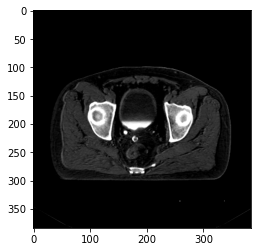

In [9]:
plt.figure()
plt.imshow(test_result.reshape(384,384),cmap="gray")
plt.show()

In [10]:
import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
from sklearn import preprocessing




classifier=Sequential()
classifier.add(Dense(6, activation="relu",input_dim=2))
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(3, activation="relu"))
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))

classifier.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])

classifier.fit(X,y,epochs=15,batch_size=120)

y_pred=classifier.predict(test)

Epoch 1/15
1229/1229 [==============================] - 1s 848us/step - loss: 17.1368 - accuracy: 0.5384
Epoch 2/15
1229/1229 [==============================] - 1s 821us/step - loss: 17.0043 - accuracy: 0.6316
Epoch 3/15
1229/1229 [==============================] - 1s 782us/step - loss: 16.9935 - accuracy: 0.6379
Epoch 4/15
1229/1229 [==============================] - 1s 773us/step - loss: 16.9904 - accuracy: 0.6374
Epoch 5/15
1229/1229 [==============================] - 1s 785us/step - loss: 16.9887 - accuracy: 0.6370
Epoch 6/15
1229/1229 [==============================] - 1s 778us/step - loss: 16.9870 - accuracy: 0.6377
Epoch 7/15
1229/1229 [==============================] - 1s 789us/step - loss: 16.9856 - accuracy: 0.6379
Epoch 8/15
1229/1229 [==============================] - 1s 781us/step - loss: 16.9844 - accuracy: 0.6386
Epoch 9/15
1229/1229 [==============================] - 1s 795us/step - loss: 16.9831 - accuracy: 0.6394
Epoch 10/15
1229/1229 [==============================] 

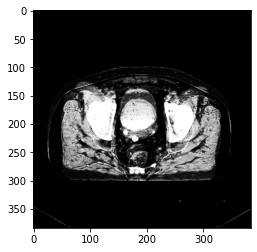

In [11]:
size=int(math.sqrt(len(y_pred)))
plt.figure()
plt.imshow(y_pred.reshape(size,size),cmap="gray")
plt.show()